<a href="https://colab.research.google.com/github/FarizieFar/PVCK/blob/main/Modul6_Histogram_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

#Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
from PIL import Image


In [8]:
gambar = Image.open('drive/MyDrive/PCVK/lena.jpg')
gambar.show()

In [10]:
gambar = gambar.convert('RGB')

In [12]:
# Dapatkan semua pixel gambar
pixels = list(gambar.getdata())

# Hitung jumlah kemunculan setiap warna
pixel_counts = {}
for pixel in pixels:
    if pixel in pixel_counts:
        pixel_counts[pixel] += 1
    else:
        pixel_counts[pixel] = 1

# Hasilnya adalah kamus (dictionary) di mana kunci adalah warna piksel dan nilai adalah jumlah kemunculan.
print(pixel_counts)

{(223, 158, 130): 3, (222, 157, 129): 2, (221, 156, 128): 3, (220, 155, 125): 3, (219, 154, 122): 6, (223, 159, 124): 4, (222, 158, 122): 3, (221, 157, 121): 1, (220, 156, 118): 3, (218, 154, 116): 2, (217, 153, 115): 1, (216, 153, 112): 4, (215, 152, 109): 2, (213, 151, 104): 3, (217, 155, 106): 1, (220, 158, 109): 2, (219, 157, 108): 4, (215, 153, 104): 5, (212, 150, 101): 8, (214, 152, 103): 7, (211, 149, 100): 7, (213, 149, 101): 4, (215, 151, 103): 1, (217, 153, 105): 4, (221, 157, 109): 8, (223, 159, 111): 4, (224, 160, 112): 7, (231, 167, 119): 6, (230, 166, 118): 7, (233, 169, 121): 4, (238, 174, 126): 4, (240, 176, 128): 2, (237, 173, 125): 3, (232, 172, 122): 1, (229, 173, 122): 2, (228, 175, 123): 1, (231, 176, 122): 13, (234, 174, 122): 4, (234, 171, 118): 3, (234, 167, 115): 3, (233, 161, 113): 3, (231, 157, 112): 1, (209, 131, 92): 4, (222, 144, 108): 1, (222, 145, 117): 2, (204, 128, 104): 1, (182, 106, 90): 2, (167, 95, 81): 4, (158, 86, 74): 1, (147, 80, 71): 2, (130, 

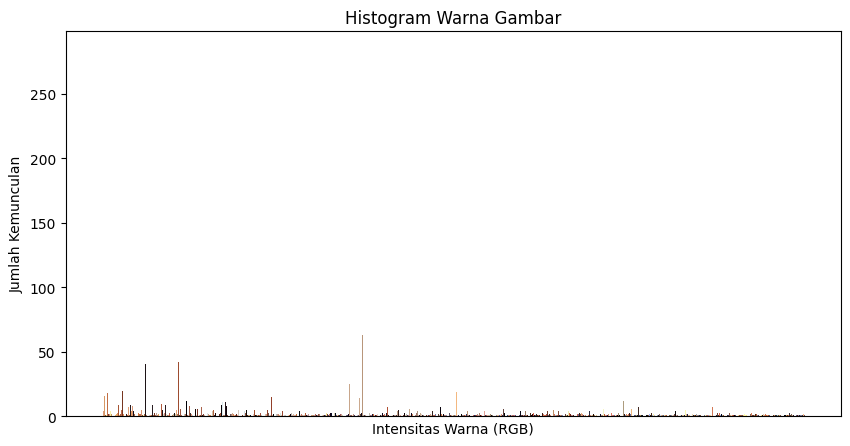

In [13]:
# Buka gambar
gambar = Image.open('drive/MyDrive/PCVK/lena.jpg')

# Konversi gambar ke mode 'RGB' (jika belum dalam mode tersebut)
gambar = gambar.convert('RGB')

# Dapatkan semua pixel gambar
pixels = list(gambar.getdata())

# Hitung jumlah kemunculan setiap warna
pixel_counts = {}
for pixel in pixels:
    if pixel in pixel_counts:
        pixel_counts[pixel] += 1
    else:
        pixel_counts[pixel] = 1

# Pisahkan warna RGB menjadi tiga daftar terpisah
red_values, green_values, blue_values = zip(*pixel_counts.keys())
counts = list(pixel_counts.values())

# Buat histogram
plt.figure(figsize=(10, 5))
plt.bar(range(len(counts)), counts, color=[(r / 255, g / 255, b / 255) for r, g, b in pixel_counts.keys()])
plt.xlabel('Intensitas Warna (RGB)')
plt.ylabel('Jumlah Kemunculan')
plt.title('Histogram Warna Gambar')
plt.xticks([])  # Hapus tanda sumbu X (akan sangat padat jika warna diurutkan)
plt.show()

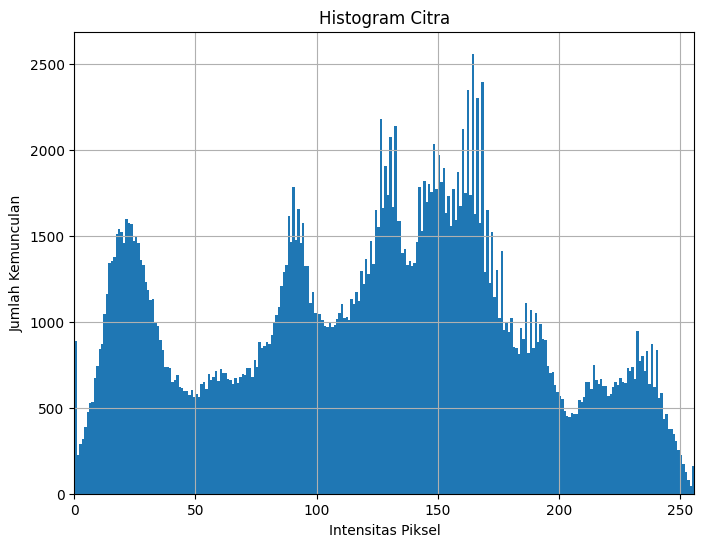

In [14]:
import cv2

# Buka citra
gambar = cv2.imread('drive/MyDrive/PCVK/lena.jpg', 0)  # Gunakan '0' untuk membaca citra dalam mode skala abu-abu

# Hitung histogram
histogram = cv2.calcHist([gambar], [0], None, [256], [0, 256])

# Gambar histogram
plt.figure(figsize=(8, 6))
plt.hist(gambar.ravel(), 256, [0, 256])
plt.title('Histogram Citra')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)  # Batasan sumbu X
plt.grid()
plt.show()

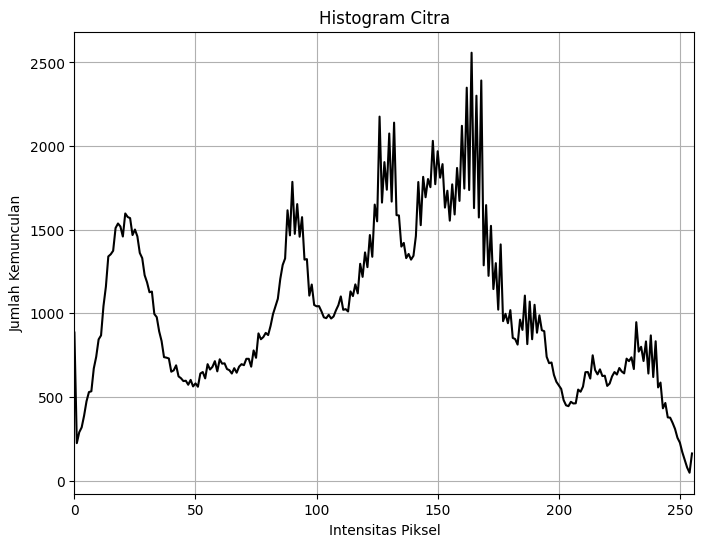

In [15]:
import cv2
import numpy as np

# Buka citra
gambar = cv2.imread('drive/MyDrive/PCVK/lena.jpg', 0)  # Gunakan '0' untuk membaca citra dalam mode skala abu-abu

# Hitung histogram menggunakan NumPy
histogram, _ = np.histogram(gambar, bins=np.arange(257))

# Gambar histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Histogram Citra')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)  # Batasan sumbu X
plt.grid()
plt.show()


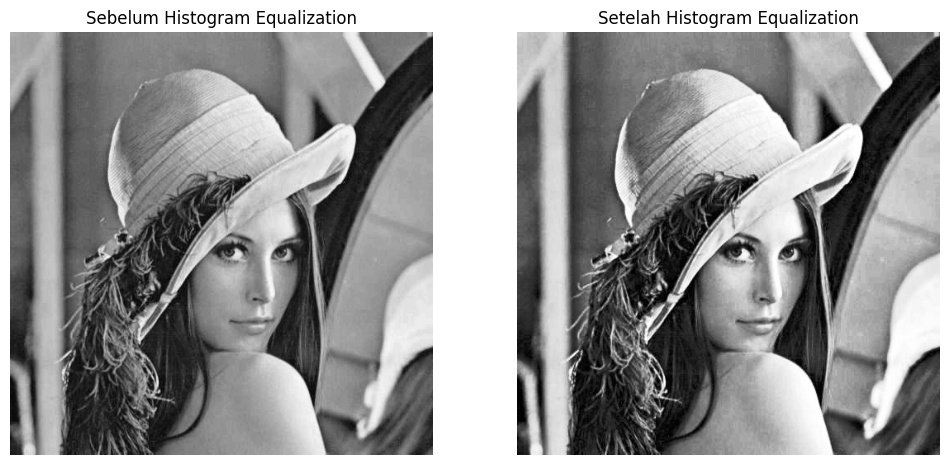

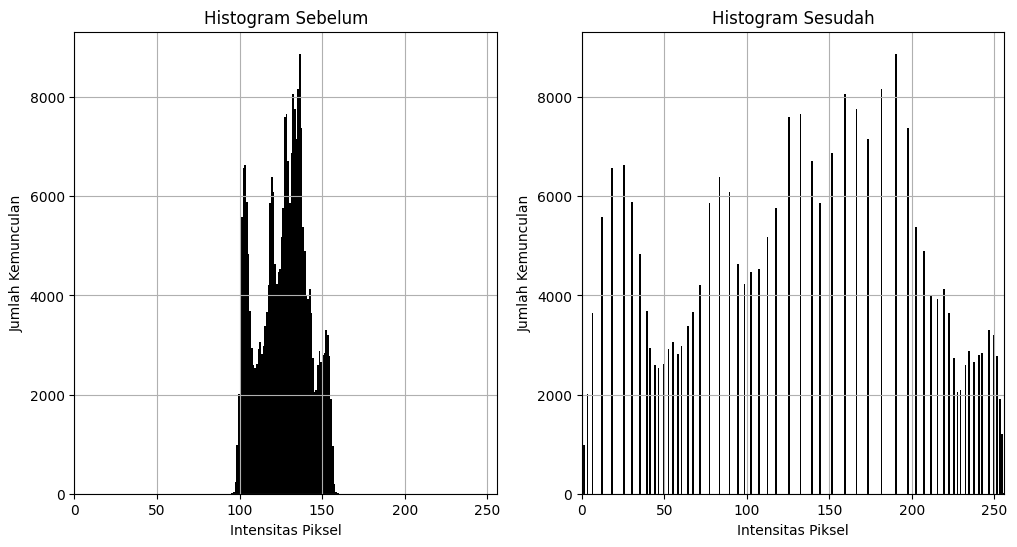

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Buka gambar
gambar = cv2.imread('drive/MyDrive/PCVK/lena_lc.jpg', 0)

# Menghitung jumlah kemunculan setiap piksel warna pada nilai tertentu (Frekuensi)
hist = cv2.calcHist([gambar], [0], None, [256], [0, 256])

# Penjumlahan kumulatif dari frekuensi yang sudah diketahui
cdf = hist.cumsum()

# Jumlah total piksel dalam gambar
total_pixels = gambar.size

# Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel
cdf_normalized = cdf / total_pixels

# Implementasi rumus K0
skala_warna = (cdf_normalized * 255).astype('uint8')

# Histogram Equalization
gambar_equalized = skala_warna[gambar]

# Menampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))

# Gambar sebelum histogram equalization
plt.subplot(1, 2, 1)
plt.imshow(gambar, cmap='gray')
plt.title('Sebelum Histogram Equalization')
plt.axis('off')

# Gambar sesudah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(gambar_equalized, cmap='gray')
plt.title('Setelah Histogram Equalization')
plt.axis('off')

plt.show()

# Histogram gambar sebelum dan sesudah
plt.figure(figsize=(12, 6))

# Histogram gambar sebelum
plt.subplot(1, 2, 1)
plt.hist(gambar.ravel(), 256, [0, 256], color='black')
plt.title('Histogram Sebelum')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)
plt.grid()

# Histogram gambar sesudah
plt.subplot(1, 2, 2)
plt.hist(gambar_equalized.ravel(), 256, [0, 256], color='black')
plt.title('Histogram Sesudah')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)
plt.grid()

plt.show()


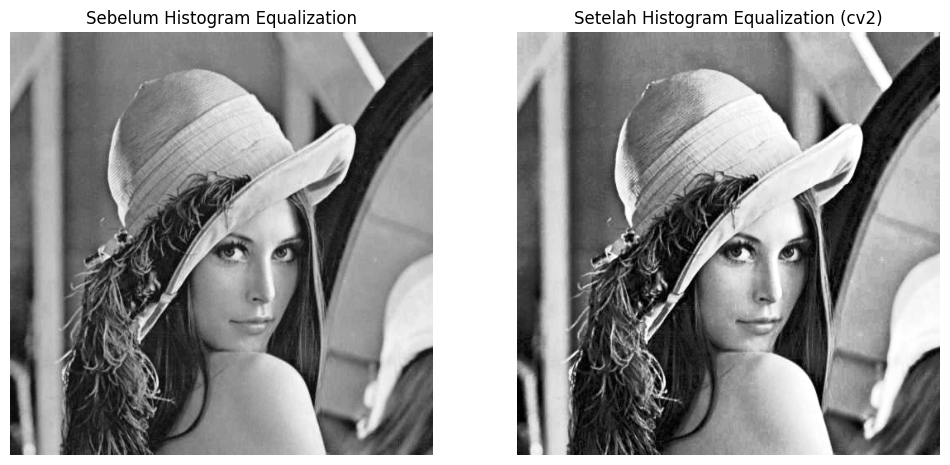

In [17]:
import cv2
import matplotlib.pyplot as plt

# Buka gambar
gambar = cv2.imread('drive/MyDrive/PCVK/lena_lc.jpg', 0)

# Lakukan histogram equalization menggunakan cv2.equalizeHist
equalized = cv2.equalizeHist(gambar)

# Menampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))

# Gambar sebelum histogram equalization
plt.subplot(1, 2, 1)
plt.imshow(gambar, cmap='gray')
plt.title('Sebelum Histogram Equalization')
plt.axis('off')

# Gambar sesudah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Setelah Histogram Equalization (cv2)')
plt.axis('off')

plt.show()


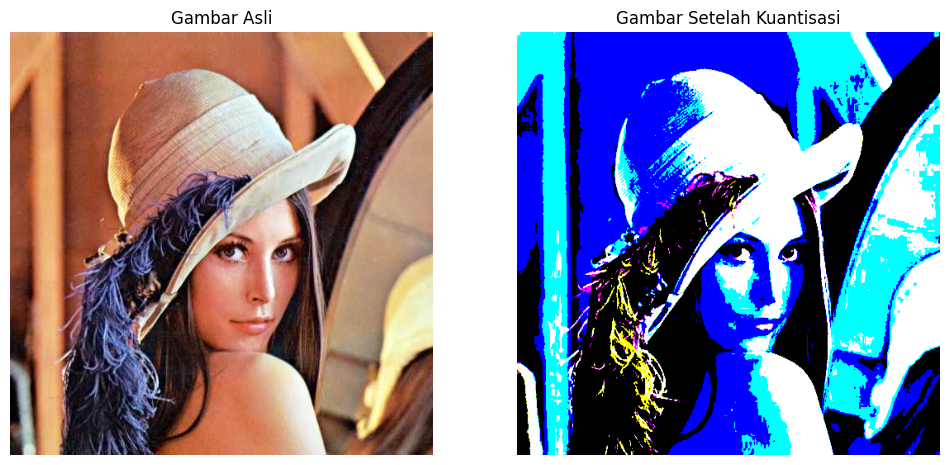

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Buka gambar
gambar = cv2.imread('drive/MyDrive/PCVK/lena.jpg')

# Daftar warna referensi (8 warna yang diinginkan)
warna_referensi = np.array([
    [0, 0, 0],        # Hitam
    [0, 255, 0],      # Hijau
    [255, 255, 0],    # Kuning
    [0, 0, 255],      # Biru
    [0, 255, 255],    # Cyan
    [255, 0, 255],    # Magenta
    [255, 255, 255]   # Putih
])

# Ubah gambar menjadi citra 3D
gambar_3d = gambar.reshape(-1, 3)

# Hitung jarak antara setiap piksel dengan semua warna referensi
jarak = np.linalg.norm(gambar_3d[:, np.newaxis] - warna_referensi, axis=2)

# Temukan indeks warna referensi yang memiliki jarak terkecil
indeks_terdekat = np.argmin(jarak, axis=1)

# Ubah gambar menjadi citra hasil kuantisasi
citra_kuantisasi = warna_referensi[indeks_terdekat].reshape(gambar.shape)

# Tampilkan gambar sebelum dan sesudah kuantisasi
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Gambar setelah kuantisasi
plt.subplot(1, 2, 2)
plt.imshow(citra_kuantisasi, cmap='gray')  # Menggunakan cmap='gray' untuk tampilan hitam putih
plt.title('Gambar Setelah Kuantisasi')
plt.axis('off')

plt.show()


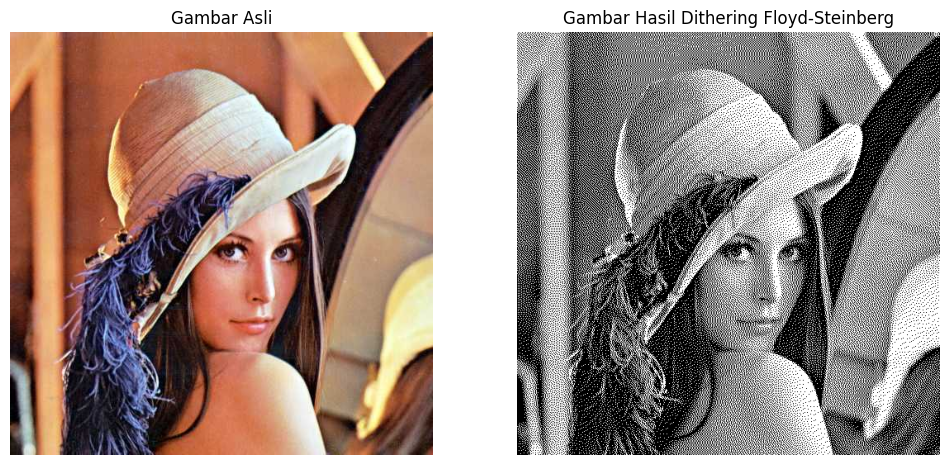

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dithering_floyd_steinberg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi gambar ke skala abu-abu
    h, w = img.shape
    new_img = np.copy(img).astype(np.float32)

    for y in range(h):
        for x in range(w):
            old_pixel = new_img[y, x]
            new_pixel = round(old_pixel / 255) * 255
            new_img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < w - 1:
                new_img[y, x + 1] += error * 7 / 16
            if y < h - 1:
                if x > 0:
                    new_img[y + 1, x - 1] += error * 3 / 16
                new_img[y + 1, x] += error * 5 / 16
                if x < w - 1:
                    new_img[y + 1, x + 1] += error * 1 / 16

    new_img = new_img.astype(np.uint8)
    return new_img

# Buka gambar
gambar = cv2.imread('drive/MyDrive/PCVK/lena.jpg')

# Lakukan dithering Floyd-Steinberg
hasil_dithering = dithering_floyd_steinberg(gambar)

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Gambar hasil dithering
plt.subplot(1, 2, 2)
plt.imshow(hasil_dithering, cmap='gray')  # Menggunakan cmap='gray' untuk tampilan hitam putih
plt.title('Gambar Hasil Dithering Floyd-Steinberg')
plt.axis('off')

plt.show()


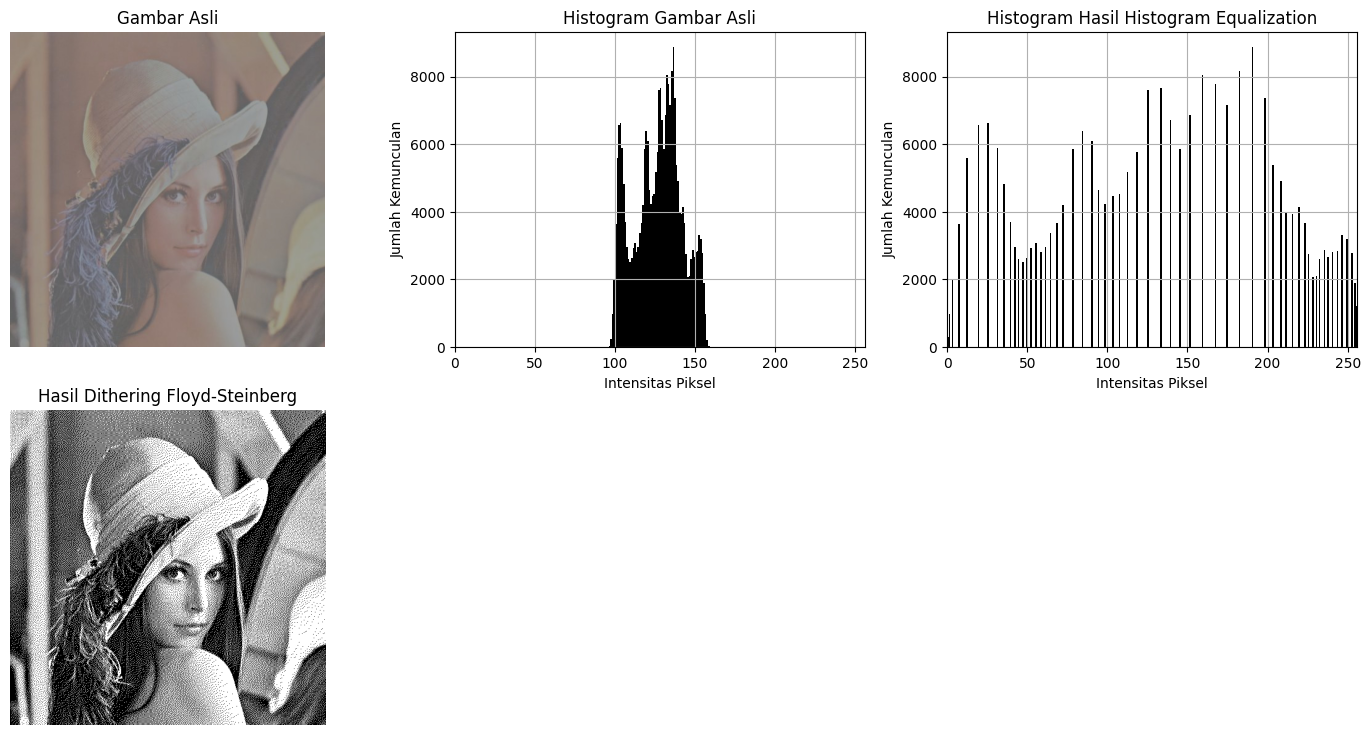

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dithering_floyd_steinberg(img):
    h, w = img.shape
    new_img = np.copy(img).astype(np.float32)

    for y in range(h):
        for x in range(w):
            old_pixel = new_img[y, x]
            new_pixel = round(old_pixel / 255) * 255
            new_img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < w - 1:
                new_img[y, x + 1] += error * 7 / 16
            if y < h - 1:
                if x > 0:
                    new_img[y + 1, x - 1] += error * 3 / 16
                new_img[y + 1, x] += error * 5 / 16
                if x < w - 1:
                    new_img[y + 1, x + 1] += error * 1 / 16

    new_img = new_img.astype(np.uint8)
    return new_img

# Buka gambar
gambar = cv2.imread('drive/MyDrive/PCVK/lena_lc.jpg')

# Ubah gambar menjadi citra skala abu-abu
gray_image = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

# Lakukan histogram equalization
equalized = cv2.equalizeHist(gray_image)

# Lakukan dithering Floyd-Steinberg pada hasil histogram equalization
hasil_dithering = dithering_floyd_steinberg(equalized)

# Hitung histogram dari gambar asli
hist_asli = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Tampilkan gambar asli, histogram gambar asli, histogram hasil histogram equalization, dan hasil dithering
plt.figure(figsize=(18, 9))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Histogram gambar asli
plt.subplot(2, 3, 2)
plt.hist(gray_image.ravel(), 256, [0, 256], color='black')
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)
plt.grid()

# Histogram hasil histogram equalization
plt.subplot(2, 3, 3)
plt.hist(equalized.ravel(), 256, [0, 256], color='black')
plt.title('Histogram Hasil Histogram Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 256)
plt.grid()

# Gambar hasil dithering
plt.subplot(2, 3, 4)
plt.imshow(hasil_dithering, cmap='gray')
plt.title('Hasil Dithering Floyd-Steinberg')
plt.axis('off')

plt.show()
